In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
import sys
sys.path.insert(0,"..")
from predict.prediction_batch import greedy_decode_batch
from predict.prediction_string import decode_seq_str, decode_interacively
import pdb
from model.loss import LossCompute
import os
from io_.info_print import printing
from model.seq2seq import LexNormalizer
from model.generator import Generator
from evaluate.interact import interact
MAX_LEN = 20
script_dir = "."

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#model_folder_starts_with = "f2f2-batchXdropout_char0.1-to_char_src-1_dir_sent-10_batch_size-model_18_aa04"
#model_folder_starts_with = "f178-DROPOUT_EVEN_INCREASE-0.1-to_sent+word+bridge_out-model_3_046c"
#model_folder_starts_with = "8ce6b-extend_ep-get_True-attention_simplifiedXauxXdropout0.1_scale_aux-True_aux-0.1do_char_dec-True_char_src_atten-model_14_ad6c"
#model_folder_starts_with = "a5c77"
#model_folder_starts_with = "fef8-new_data-batchXdropout_char0-to_char_src-1_dir_sent-10_batch_size-model_2_51a5"
#model_folder_starts_with = "e3900-liu-attention+unrolling0.2-to_char_src-1_dir_sent-15_batch-dir_word_src_1-unrolling_word_True-char_src_attention_False-model_2_14c2"
#model_folder_starts_with = "e3900-liu-attention+unrolling0.2-to_char_src-1_dir_sent-15_batch-dir_word_src_1-unrolling_word_True-char_src_attention_True-model_3_1a3"
#model_folder_starts_with ="8ce6b"
#model_folder_starts_with = "8e628"
#model_folder_starts_with = "84736"
#model_folder_starts_with = "84736-84736-SENT_context-get_True-attention_simplifiedXdrop_out_charXdir_word1dir_word-False_aux-0do_char_dec-True_char_src_atten-model_10_b59b"
#model_folder_starts_with = "84736-84736-SENT_context-get_True-attention_simplifiedXdrop_out_charXdir_word1dir_word-False_aux-0do_char_dec-False_char_src_atten-model_9_bb70"
model_folder_starts_with = "b9e49-aux_report+dense+ponderatipn+no_bucketing100-dense_dim_auxilliary0.001weight_binary_loss0.2-to_char_src-1_dir_sent-10_batch-dir_word_src_1-unrolling_word_True-char_src_attention_False-model_9_0f05"
#model_folder_starts_with = "97068_rioc-b91d7-aux-again-biggerREPLICATE-replicate1-2dir_word-None_aux-model_19_fb56"
#model_folder_starts_with = "97079_rioc-ef365-ATTbest-scale-2-True-25dir_word_encoder-all_context-att2-model_1_cade"
#model_folder_starts_with = "97077_rioc-ee386-REP_-replicate1-1dir-scale_1-model_15_f19e"
#model_folder_starts_with = "97147_rioc-6ed16-ATTCONTEXT-with_att-dir_2-X-dropout_bridge0.1-context_word-model_4_76a1"
#model_folder_starts_with = "97147_rioc-6ed16-ATTCONTEXT-with_att-dir_2-X-dropout_bridge0.1-context_sent-model_2_7d92"
#model_folder_starts_with = "97147_rioc-6ed16-ATTCONTEXT-with_att-dir_2-X-dropout_bridge0.1-context_word-model_4_76a1"
#model_folder_starts_with = "97184_rioc-0cc46-ATTstandart_passing-with_att-dir_2-X-context_all-stable_decoding_state-init_context_decoder_False-model_4_2ffa"
#model_folder_starts_with = "97221_rioc-3e4f2-ATTattentionXauxXcont-big-teacher-with_att-dir_2-X-context_word-stable_decod-init_con_False-teacher_forceprop10_True-model_4_c551"
#model_folder_starts_with = "97221_rioc-3e4f2-ATTattentionXauxXcont-big-teacher-with_att-dir_2-X-context_all-stable_decod-init_con_False-teacher_forceprop10_True-model_2_7673"
#model_folder_starts_with = "97555_rioc--ATTword_vs_char-scale2-sha_context_all-auxnorm_not_norm_True-word_de_False-model_6_c253-folder"
#model_folder_starts_with = "97555_rioc--ATTword_vs_char-scale2-sha_context_all-auxnorm_not_norm_True-word_de_True-model_5_72ee-folder"
model_folder_starts_with = "97184_rioc-0cc46-ATTstandart_passing-with_att-dir_2-X-context_all-stable_decoding_state-init_context_decoder_False-model_4_2ffa"
model_folder_starts_with = "97679_rioc--ATTmodel_10-model_10_b22f-folder"
model_folder_starts_with = "4e128-WARMUP-unrolling-False0-model_1-model_1_1660-folder"
model_folder_starts_with = "97734_rioc--DEBUG-2LSMT-2dense0-model_3-model_3_88a4-folder"
#model_folder_starts_with = "97734_rioc--DEBUG-2LSMT-2dense0-model_1-model_1_413f-folder"
#model_folder_starts_with = "97734_rioc--DEBUG-2LSMT-2dense0-model_2-model_2_7a98"
model_folder_starts_with = "97793_rioc--DEBUG_NO_LOSS_PADDING-2LSMT-2dense0-model_1-model_1_b872-folder"
model_folder_starts_with = "97823_rioc--DEBUG_NO_LOSS_PADDING-LEAKY-2LSMT-2dense-5DROPOUT00-model_1-model_1_60d8-folder"


# model word context char decode no attn 
#model_folder_starts_with = "97942_rioc--DEBUG_NO_LOSS_PADDING-0-model_1-model_1_767d-folder"
model_folder_starts_with = "98349_rioc--DEBUG_NO_LOSS_PADDING-0-model_1-model_1_6249-folder"
model_folder_starts_with = "98759_rioc--DEBUG_NO_LOSS_PADDING-0-model_1-model_1_b108-folder"
model_folder_starts_with = "99428_rioc--DEBUG_NO_LOSS_PADDING-0-model_1-model_1_8fb8-folder"
#model_folder_starts_with = "99428_rioc--DEBUG_NO_LOSS_PADDING-0-model_1-model_1_8fb8-start_3_ep-X1-train_longer"
model_folder_starts_with = "99428_rioc--DEBUG_NO_LOSS_PADDING-0-model_1-model_1_8fb8-folder"
#"98759_rioc--DEBUG_NO_LOSS_PADDING-0-model_1-model_1_b108-folder"
# fake words only char2char
#model_folder_starts_with = "EU"

In [5]:
# list all models folder that starts with model_folder_starts_with
list_all_dir = os.listdir("../checkpoints/")
list_ = [dir_ for dir_ in list_all_dir if dir_.startswith(model_folder_starts_with) and not dir_.endswith("log") and not dir_.endswith("summary")]
print(list_)

['99428_rioc--DEBUG_NO_LOSS_PADDING-0-model_1-model_1_8fb8-folder']


### Model to interact with 

#### Former models : trained on Liu only , source added as concatanation of word and sentence level as h_0 of decoder , batch size = 10 , small drop out , 

- f2f2-batchXdropout_char0.1-to_char_src-1_dir_sent-10_batch_size-model_18_aa04 : very bad at interacting (NB ; pb of eval)
- f178 also good model trained on liu only 
- 8e628 : attention ; no aux (no bucket , get_batch False ) :  - attention degrades abit the results (still feedin char embedding also)
- e390 + same 24f94 goo : 
    - best is e3900-liu-attention+unrolling0.2-to_char_src-1_dir_sent-15_batch-dir_word_src_1-unrolling_word_True-char_src_attention_False-model_2_14c2 
    - same with attentin but lame : e3900-liu-attention+unrolling0.2-to_char_src-1_dir_sent-15_batch-dir_word_src_1-unrolling_word_True-char_src_attention_True-model_3_1a3f (have to do some code for reloading and visulizing !)

#### New data 
- fef8_new_data : 
- mixed data+ aix test :  8d9a0 + b9e49 to compare bucketing impact at train time 
    - /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/aux_report+dense+ponderatipn+bucketing-last-report-data.html or file:///Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/aux_report+dense+ponderatipn+bucketing-last-report-norm.html
    - /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/aux_report+dense+ponderatipn+no_bucketing-last-report-data.html or file:///Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/8d9a0-auxiililary_true_false.html
    
    
- Auxilliary tuning : best model : b9e49-aux_report+dense+ponderatipn+no_bucketing100-dense_dim_auxilliary0.001weight_binary_loss0.2-to_char_src-1_dir_sent-10_batch-dir_word_src_1-unrolling_word_True-char_src_attention_False-model_9_0f05-folderfile:///Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/aux_report+dense+ponderatipn+no_bucketing-last-report-enriched-auxilliary_task_norm_not_norm-dense_dim_view.html
-

#### Last two ablations with extending epoch + mix data + ablation on auxilliary task ponderation + attention or not  

- 8ce6b-extend_ep... 
    - super lame attention model (from ablation with all context)
    - the other one a bit better   
- a5c77 a bit better but still : no attention much better : cf. plot 

#### Smaller model + liu only 
- 84736 smaller model: still waiting for models : attention not helping 

NB : attention makes training 10 times slower  

In [6]:
#!open /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/ablation_DROPOUT_analysis.html # f178
#!open /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/ablation_DROPOUT_analysis_norm_view.html #f178
#!open /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/ablation_DROPOUT_analysis_2.html # f178 + aaad 

#!open /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/f2f2-batchXdropout_char-summary-norm_view.html
#!open /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/f2f2-batchXdropout_char-summary-data_view.html
# -- 
#!open /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/f2f2_best+01880_reproduction-VAL_TRUE.html
##file:///Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/f2f2-iterate+new_data-norm_view.html (different results with below ? get_batch due ?? )
##/Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/f2f2-batchXdropout_char-summary-norm_view.html 
## diffent from file:///Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/f2f2_best+01880_reproduction-VAL_TRUE.html val True 
#--

#!open /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/liu-attention+unrolling-more-param.html #e390
#!open file:///Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/e390_best+24f9d-VAL_FALSE.html (e390 with Vale False 10 points above!! )

#!open /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/fef8_new_data.html (very good ?)

#!open /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/extend_ep-SENT_context-get_True-attention_simplifiedXauxXdropout-last+bucket_False_eval-get_batch_False.html

#!open /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/8ce6b-extend_ep-get_True-attention_simplifiedXauxXdropout.html

#!open /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/reports/8e628-no_bucketing-get_batch_False-train-attention-last+bucket_False_eval-get_batch_False-report.json.html



--------------------------------Interatcing with new model--------------------------------
 99428_rioc--DEBUG_NO_LOSS_PADDING-0-model_1-model_1_8fb8 


Loading dictionary from ./../checkpoints/99428_rioc--DEBUG_NO_LOSS_PADDING-0-model_1-model_1_8fb8-folder/dictionaries 
MODEL : added extra X1-fine_tune_same_rate-X1- to arg directory before loading 
Loading model with argument {'char_embedding_dim': 40, 'voc_size': 277, 'symbolic_root': True, 'proportion_pred_train': None, 'hidden_size_encoder': 20, 'auxilliary_arch': {'weight_binary_loss': 1, 'dense_dim_auxilliary_pos': None, 'dense_dim_auxilliary_pos_2': None, 'auxilliary_task_norm_not_norm': False, 'auxilliary_task_norm_not_norm-dense_dim': None, 'auxilliary_task_pos': False, 'auxilliary_task_norm_not_norm-dense_dim_2': None}, 'n_trainable_parameters': 114569, 'lr': 0.001, 'encoder_arch': {'dir_word_encoder': 2, 'word_embed_init': None, 'drop_out_sent_encoder_out': 0.0, 'dropout_word_encoder_cell': 0.0, 'word_embed': False, 'dir_se

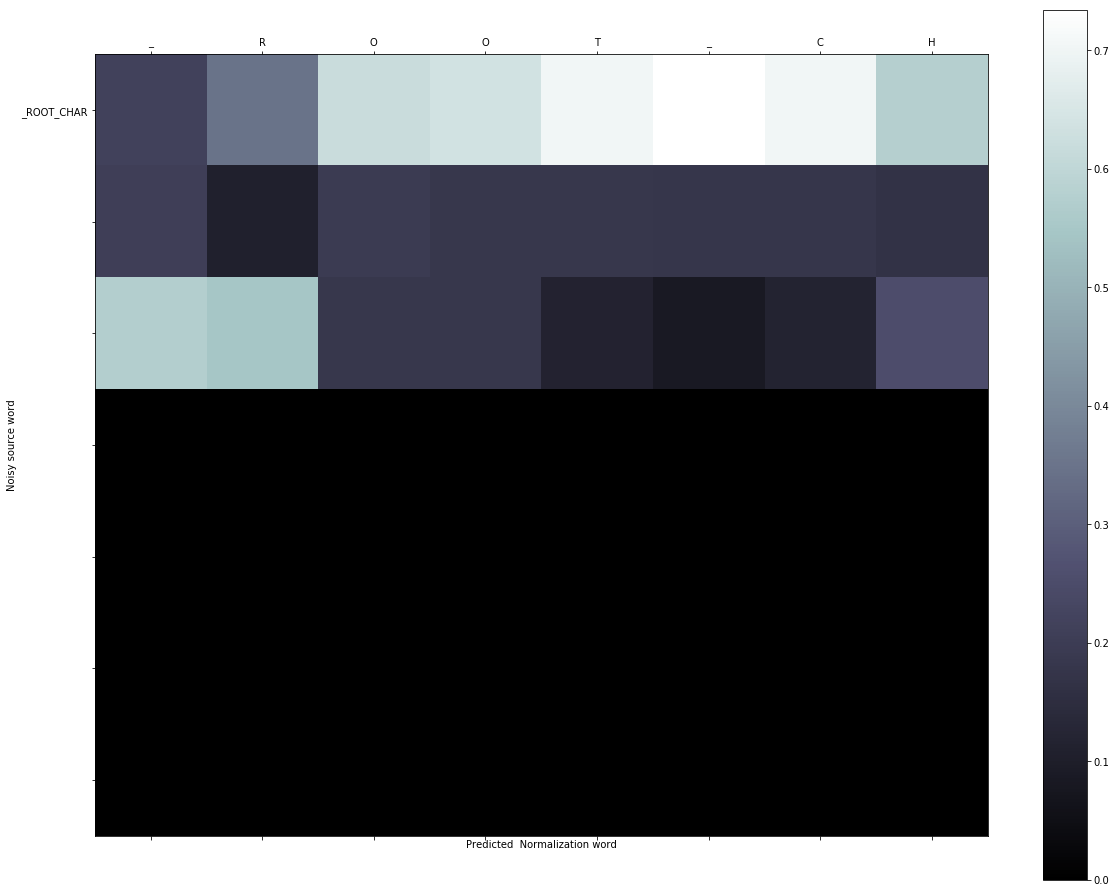

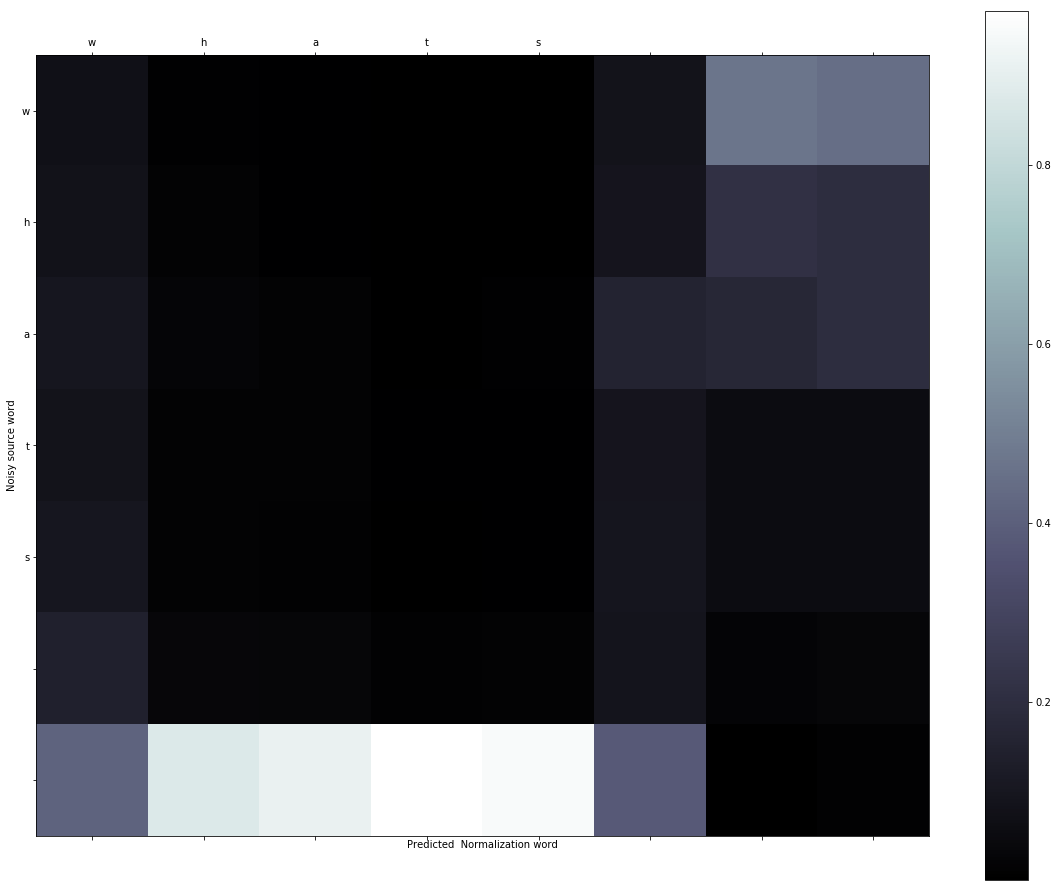

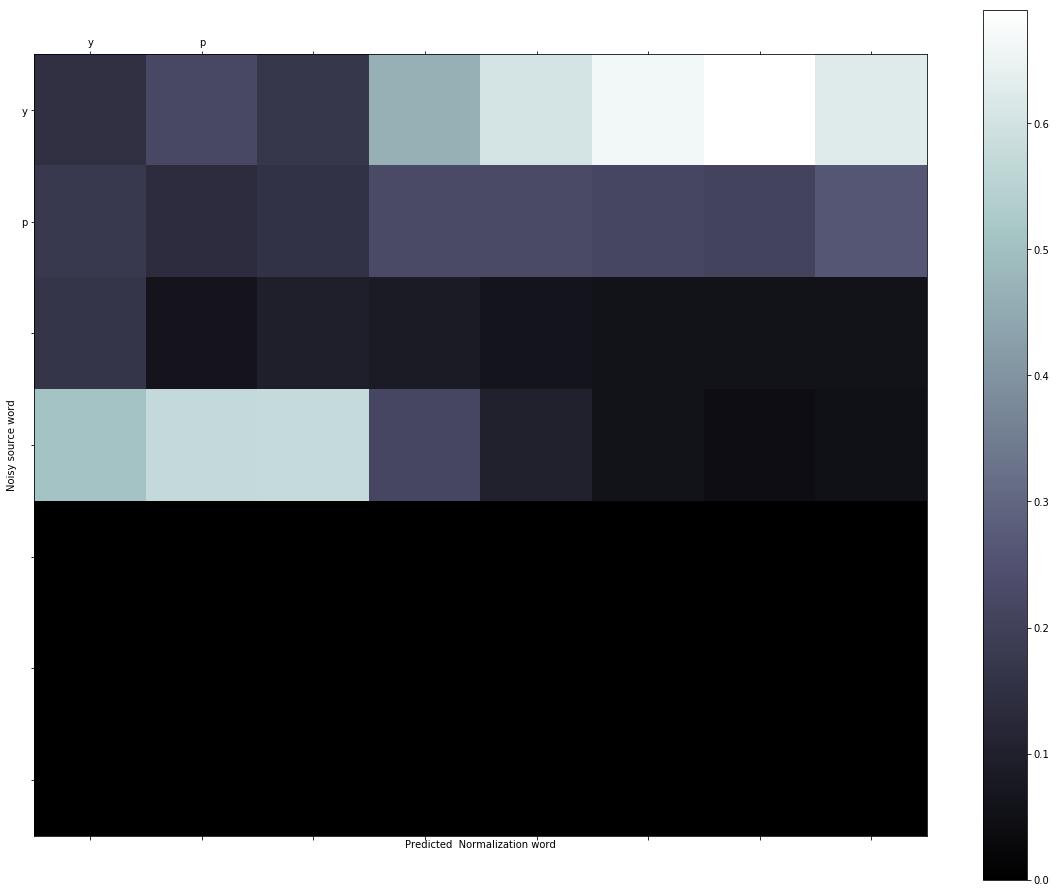

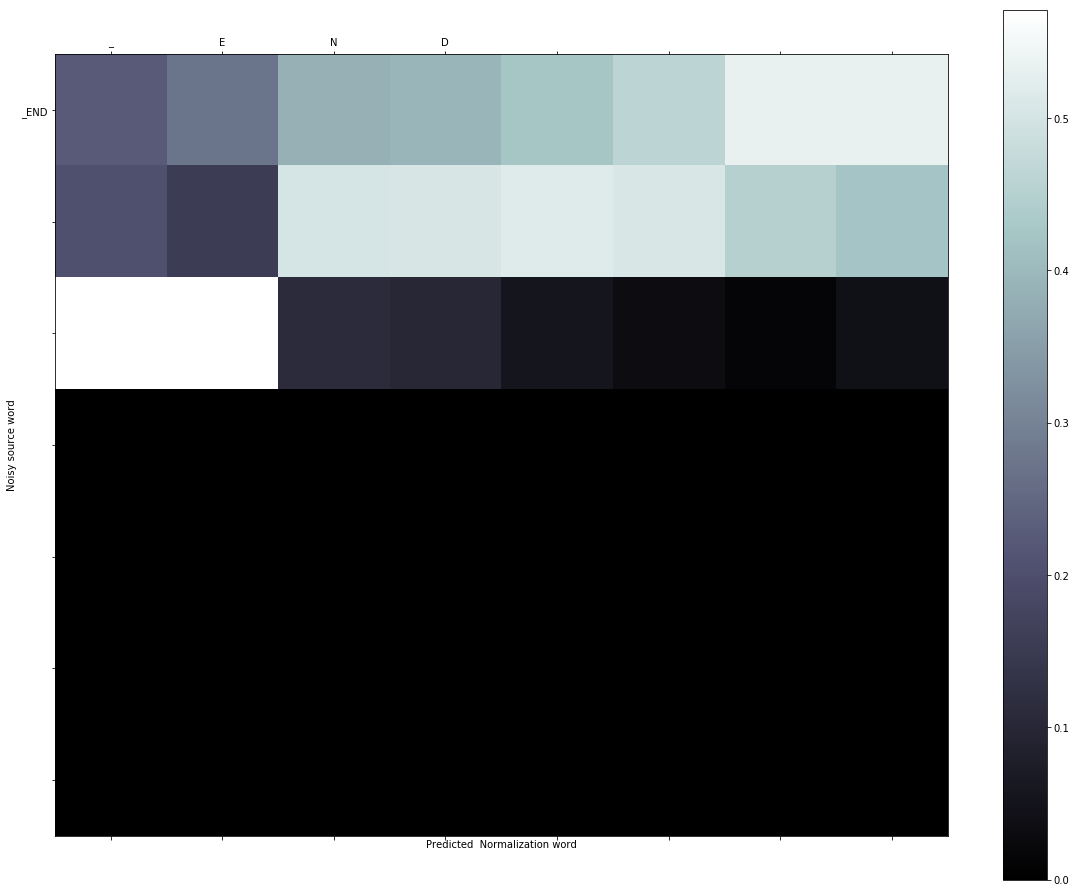

DECODED text is : ['_ROOT_CHAR', 'whats', 'yp', '_END'] original is ['_ROOT_CHAR', 'whats', 'yp', '_END'] and None seen as word embed 
Please type what you want to normalize word by word and finishes by 'stop' ? to end type : 'END'    drink
Please type what you want to normalize word by word and finishes by 'stop' ? to end type : 'END'    stop
sent ['drink']
Attention shape torch.Size([3, 6, 7])
Attention tensor([[[ 0.2170,  0.2076,  0.5754,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.3487,  0.1064,  0.5449,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.6227,  0.1973,  0.1800,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.6410,  0.1817,  0.1773,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.7061,  0.1815,  0.1124,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.7357,  0.1803,  0.0839,  0.0000,  0.0000,  0.0000,  0.0000]],

        [[ 0.0754,  0.0856,  0.1024,  0.1146,  0.1100,  0.1310,  0.3809],
         [ 0.0428,  0.0463,  0.0479,  0.0400,  0.0418,  0.0369,  0.7442

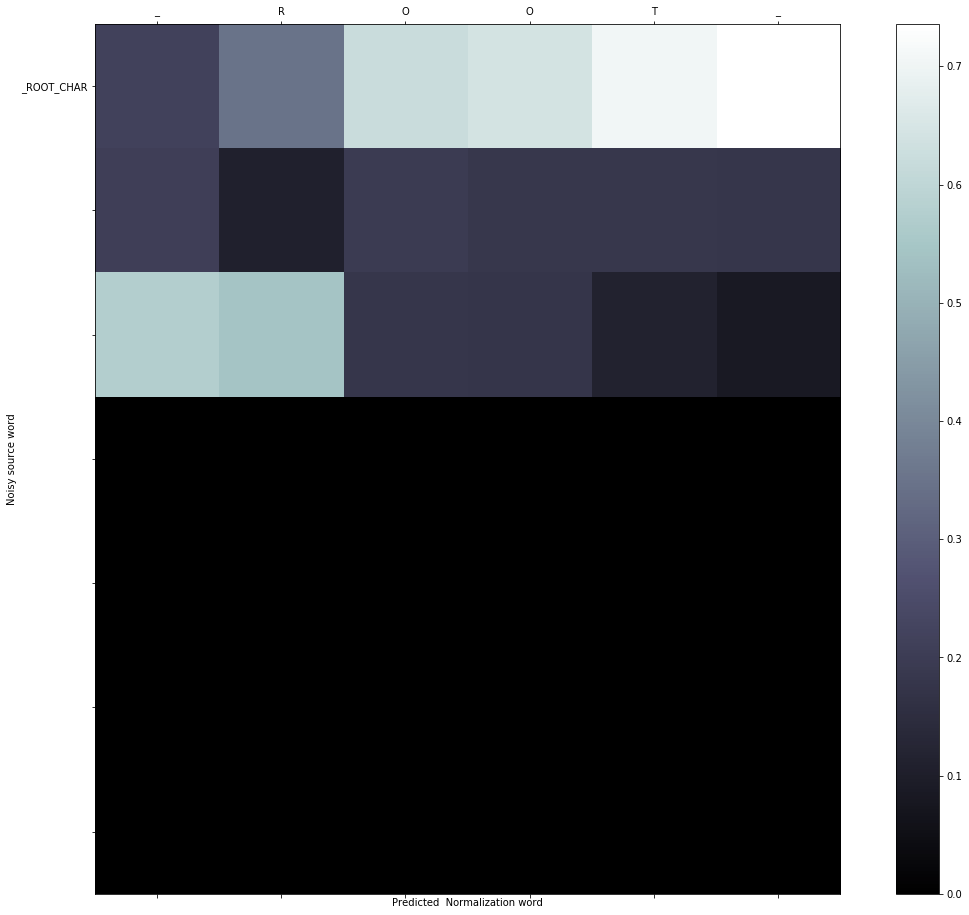

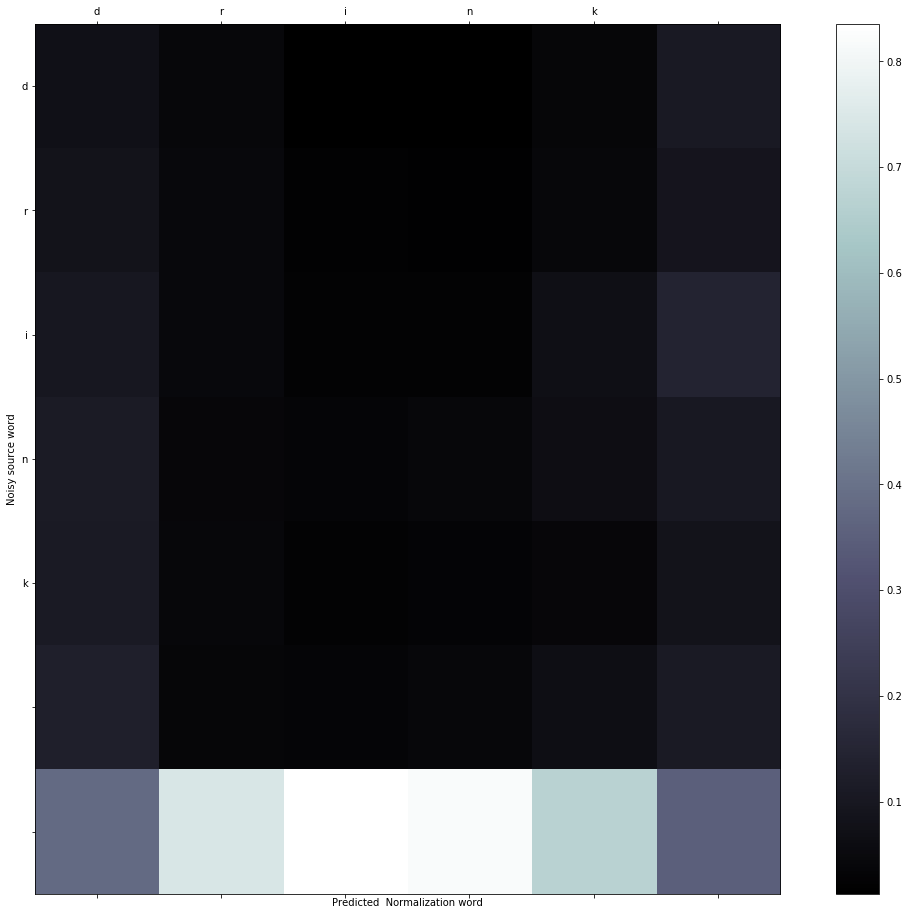

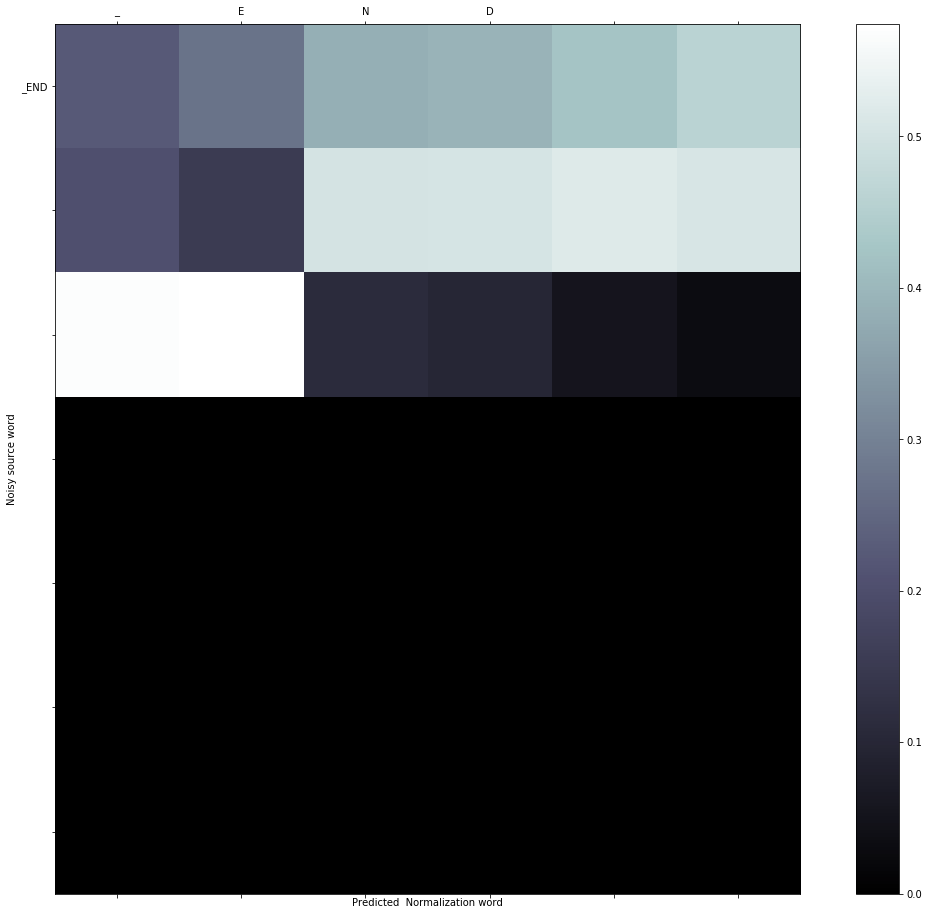

DECODED text is : ['_ROOT_CHAR', 'drink', '_END'] original is ['_ROOT_CHAR', 'drink', '_END'] and None seen as word embed 
Please type what you want to normalize word by word and finishes by 'stop' ? to end type : 'END'    wanna
Please type what you want to normalize word by word and finishes by 'stop' ? to end type : 'END'    stop
sent ['wanna']
Attention shape torch.Size([3, 6, 7])
Attention tensor([[[ 0.2170,  0.2076,  0.5754,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.3479,  0.1062,  0.5459,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.6221,  0.1972,  0.1807,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.6405,  0.1816,  0.1778,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.7058,  0.1814,  0.1127,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.7356,  0.1803,  0.0841,  0.0000,  0.0000,  0.0000,  0.0000]],

        [[ 0.0673,  0.0821,  0.0900,  0.1135,  0.1142,  0.1156,  0.4173],
         [ 0.0119,  0.0220,  0.0198,  0.0281,  0.0300,  0.0360,  0.8522],
         

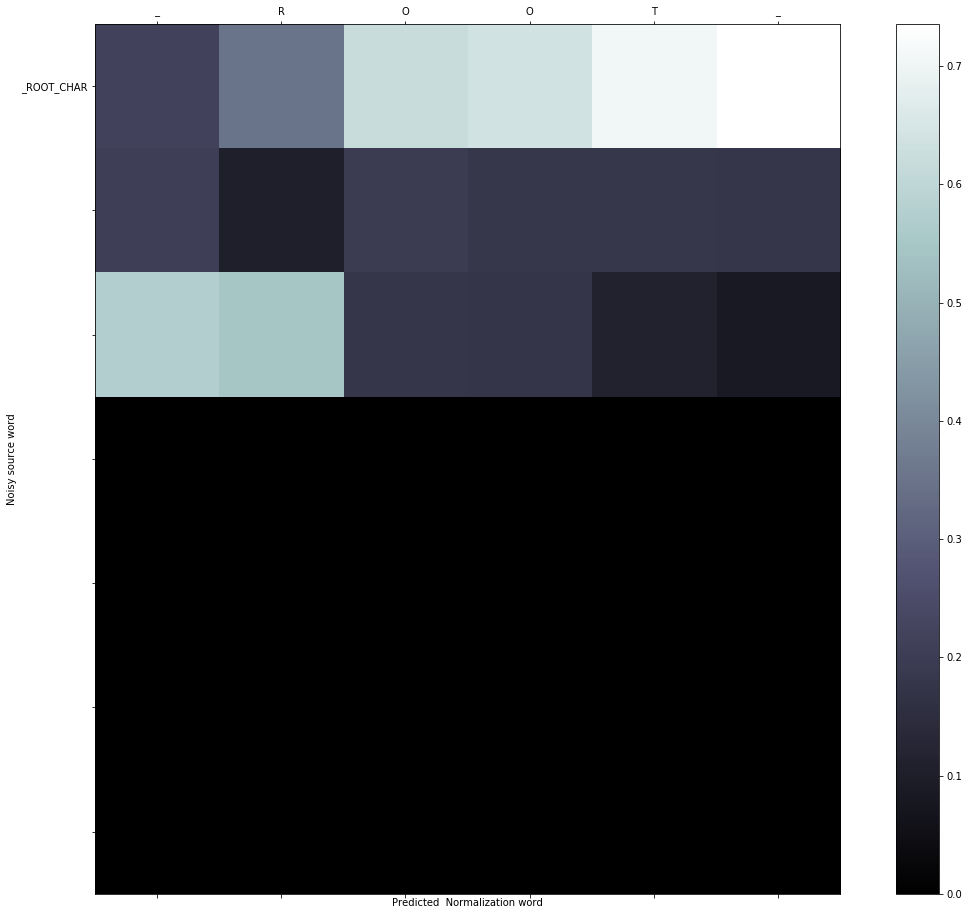

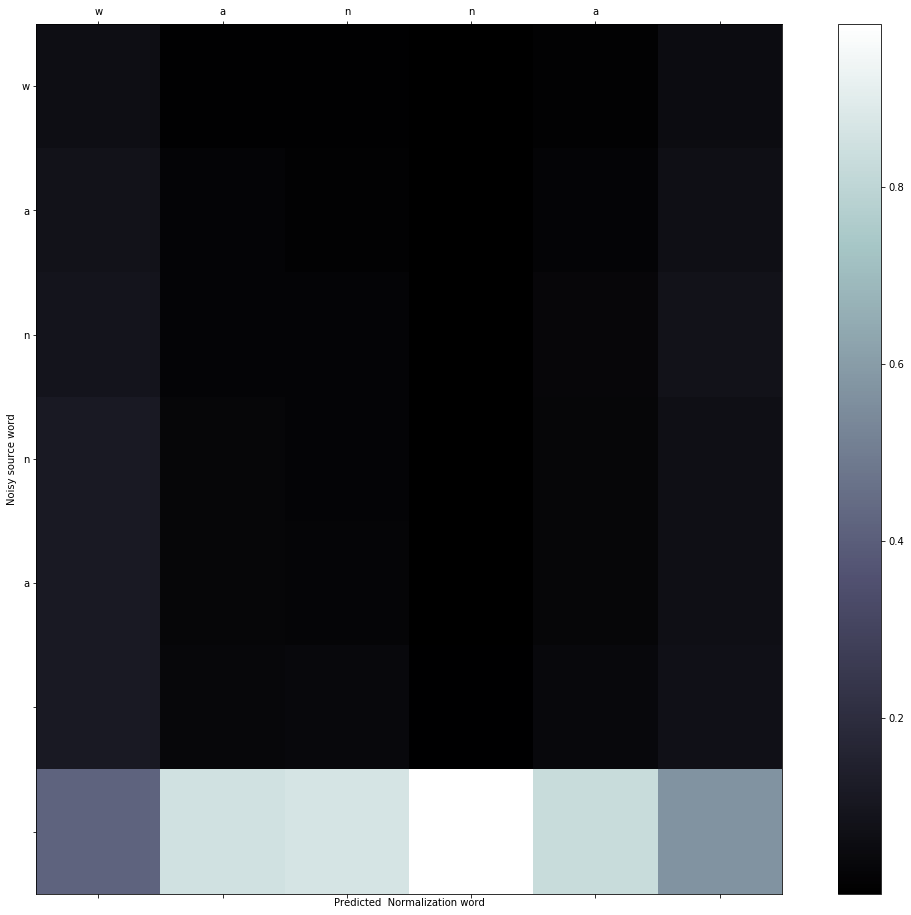

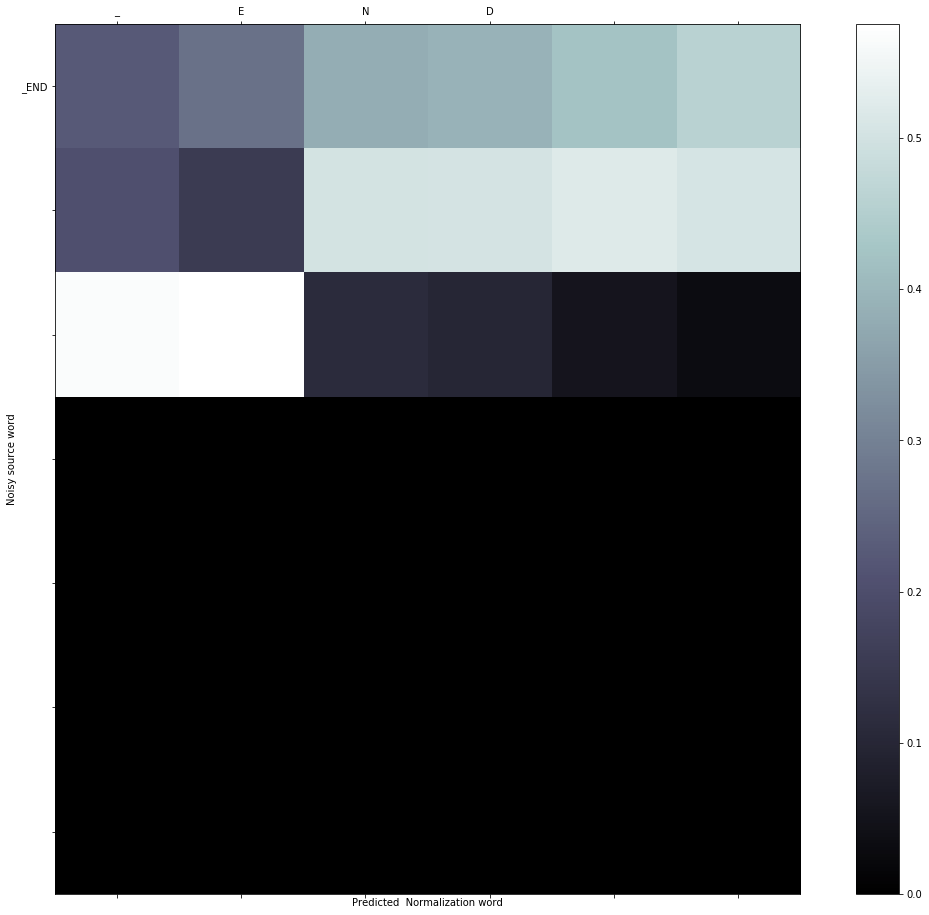

DECODED text is : ['_ROOT_CHAR', 'wanna', '_END'] original is ['_ROOT_CHAR', 'wanna', '_END'] and None seen as word embed 
Please type what you want to normalize word by word and finishes by 'stop' ? to end type : 'END'    Congrat's
Please type what you want to normalize word by word and finishes by 'stop' ? to end type : 'END'    stop
sent ["Congrat's"]
Attention shape torch.Size([3, 11, 11])
Attention tensor([[[ 0.2170,  0.2076,  0.5754,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.3494,  0.1065,  0.5441,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.6240,  0.1973,  0.1786,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.6425,  0.1818,  0.1757,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.7067,  0.1814,  0.1119,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.

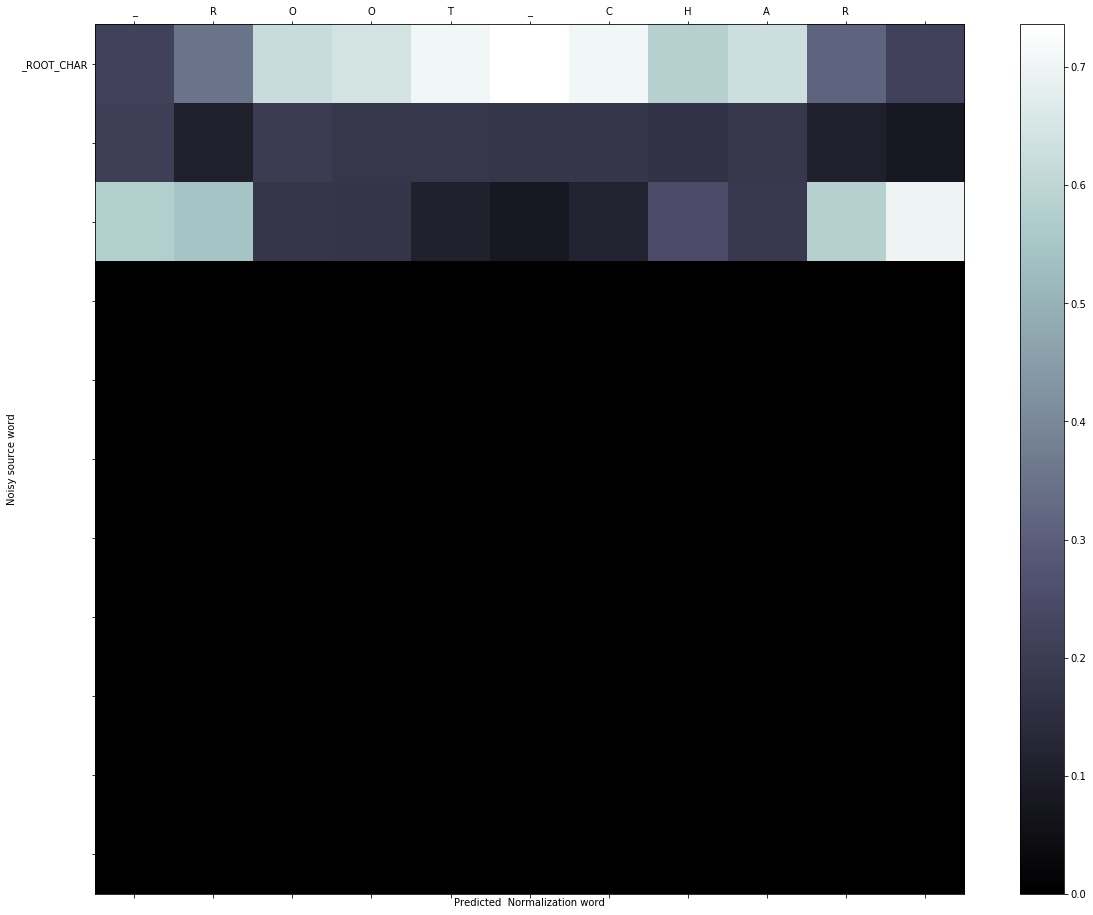

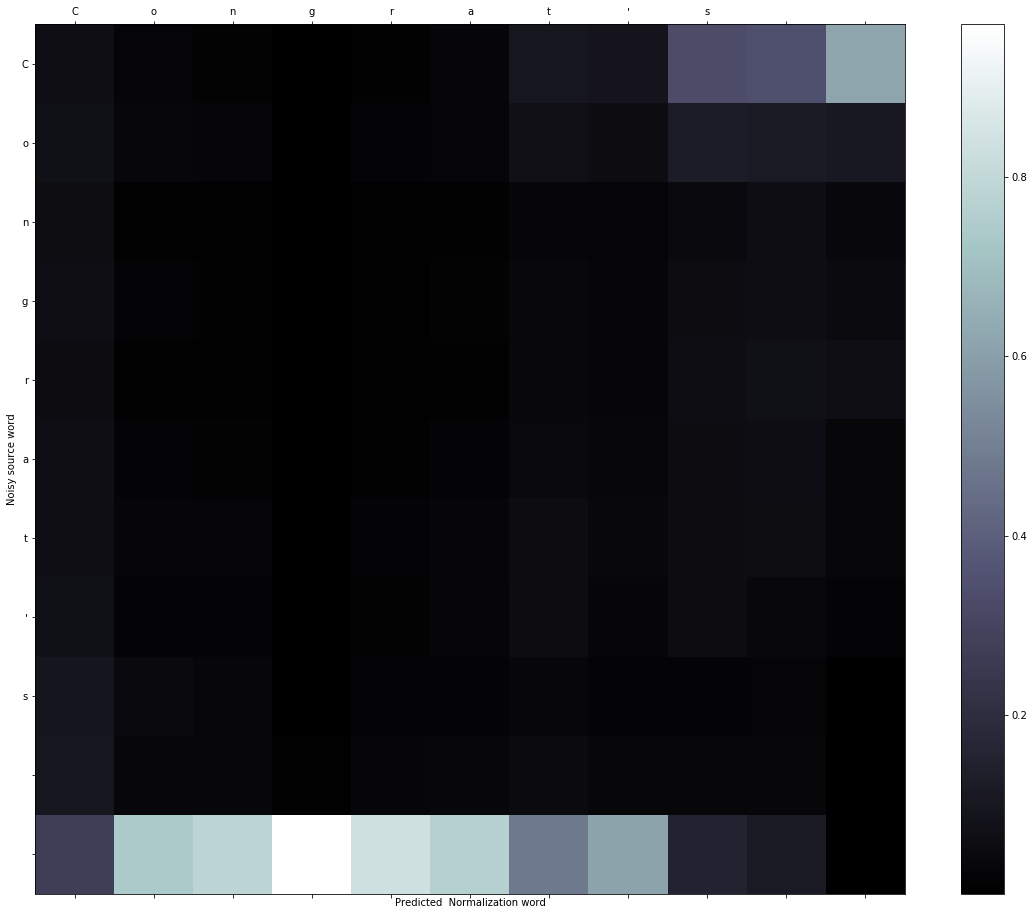

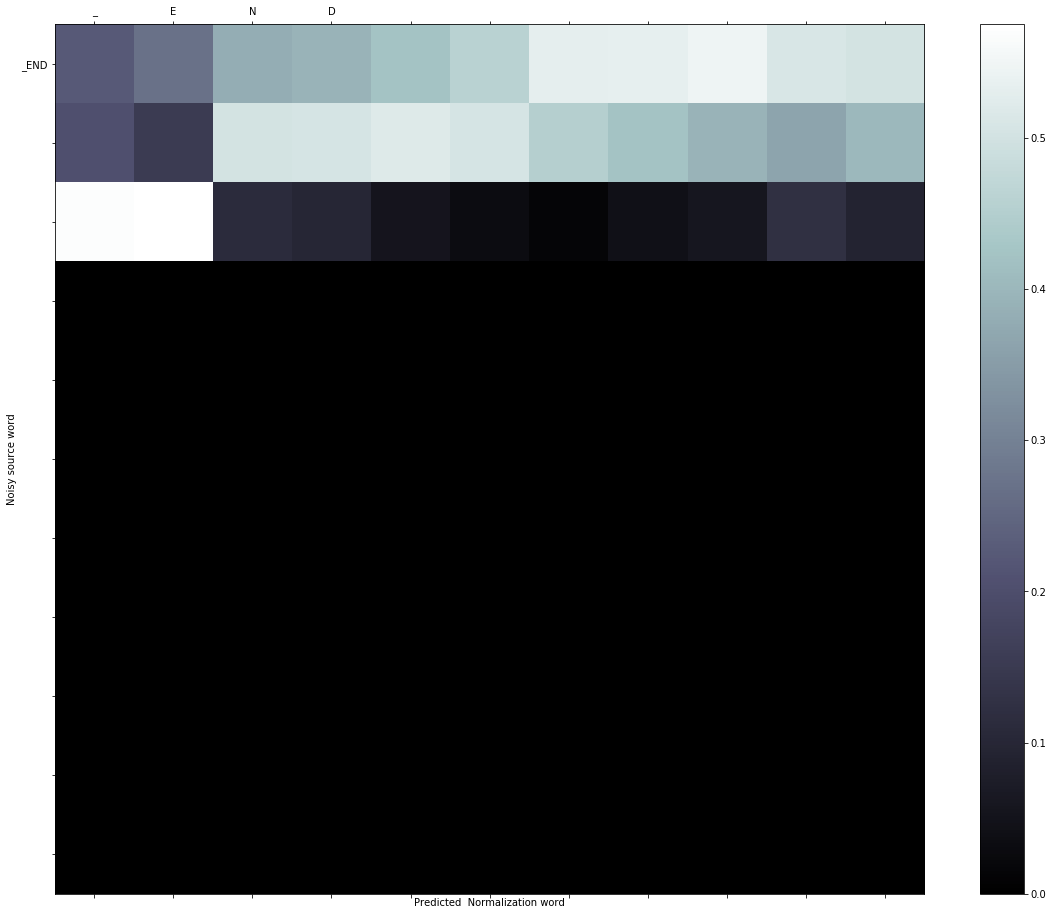

DECODED text is : ['_ROOT_CHAR', "Congrat's", '_END'] original is ['_ROOT_CHAR', "Congrat's", '_END'] and None seen as word embed 
Please type what you want to normalize word by word and finishes by 'stop' ? to end type : 'END'    fking
Please type what you want to normalize word by word and finishes by 'stop' ? to end type : 'END'    stop
sent ['fking']
Attention shape torch.Size([3, 6, 7])
Attention tensor([[[ 0.2170,  0.2076,  0.5754,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.3495,  0.1066,  0.5439,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.6237,  0.1974,  0.1789,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.6420,  0.1818,  0.1762,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.7068,  0.1815,  0.1117,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.7363,  0.1803,  0.0835,  0.0000,  0.0000,  0.0000,  0.0000]],

        [[ 0.0812,  0.0936,  0.1076,  0.1188,  0.1108,  0.1109,  0.3770],
         [ 0.0305,  0.0252,  0.0213,  0.0290,  0.0259,  0.0196,  0.8484],
 

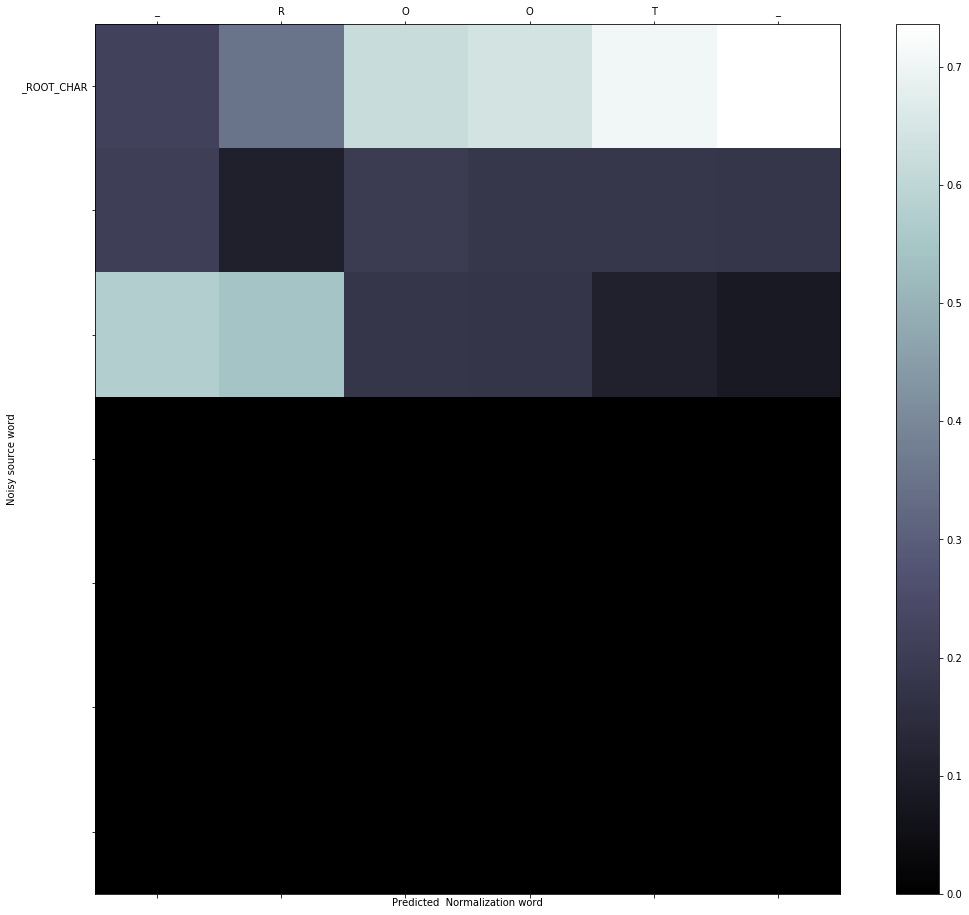

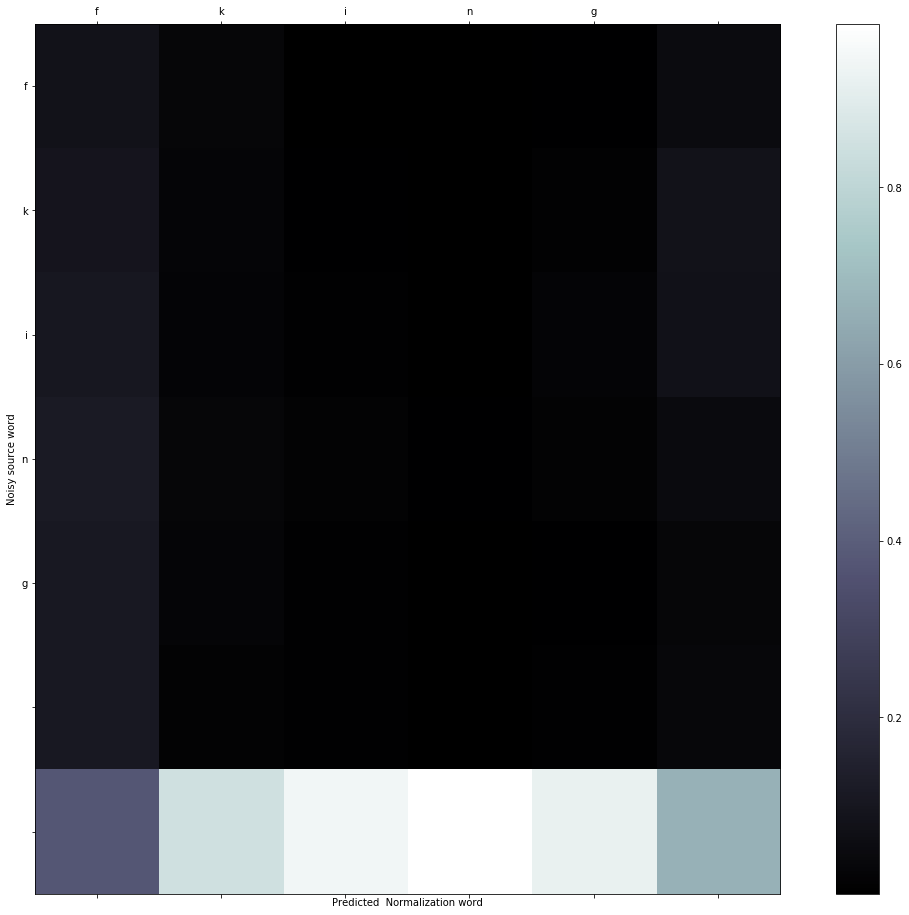

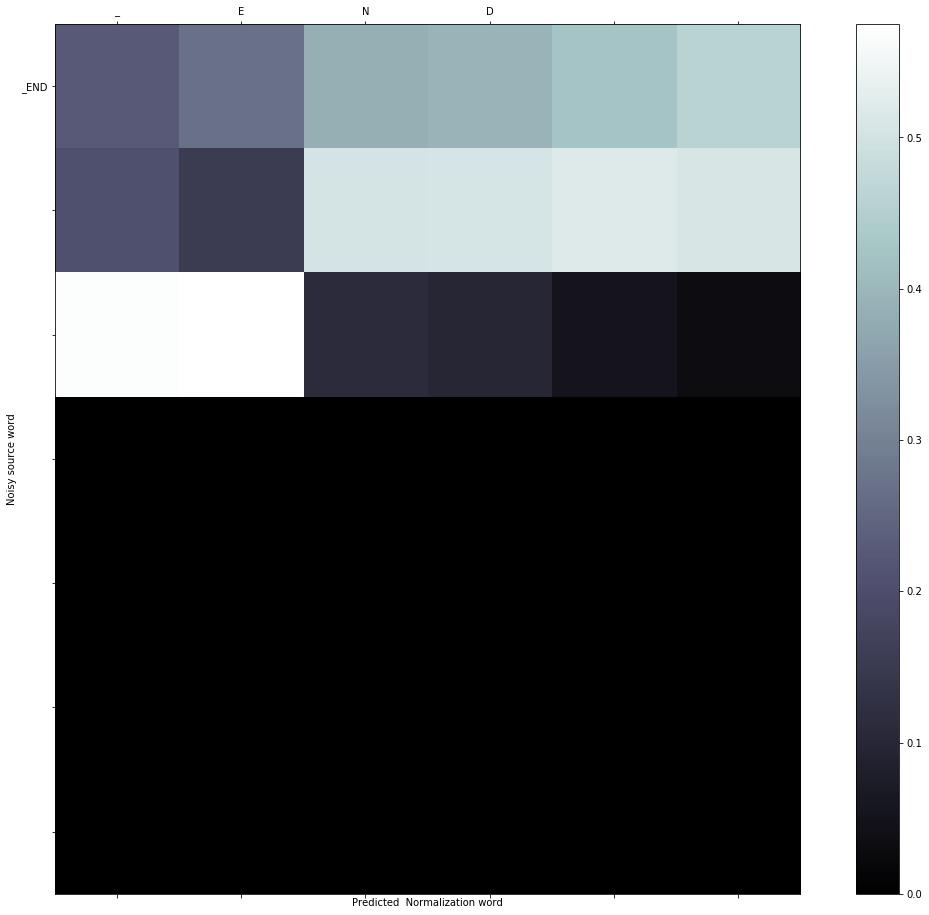

DECODED text is : ['_ROOT_CHAR', 'fking', '_END'] original is ['_ROOT_CHAR', 'fking', '_END'] and None seen as word embed 
Please type what you want to normalize word by word and finishes by 'stop' ? to end type : 'END'    FLAPPPJACCKK
Please type what you want to normalize word by word and finishes by 'stop' ? to end type : 'END'    stop
sent ['FLAPPPJACCKK']
Attention shape torch.Size([3, 11, 14])
Attention tensor([[[ 0.2170,  0.2076,  0.5754,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.3574,  0.1084,  0.5342,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.6289,  0.1984,  0.1727,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.6475,  0.1827,  0.1698,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],

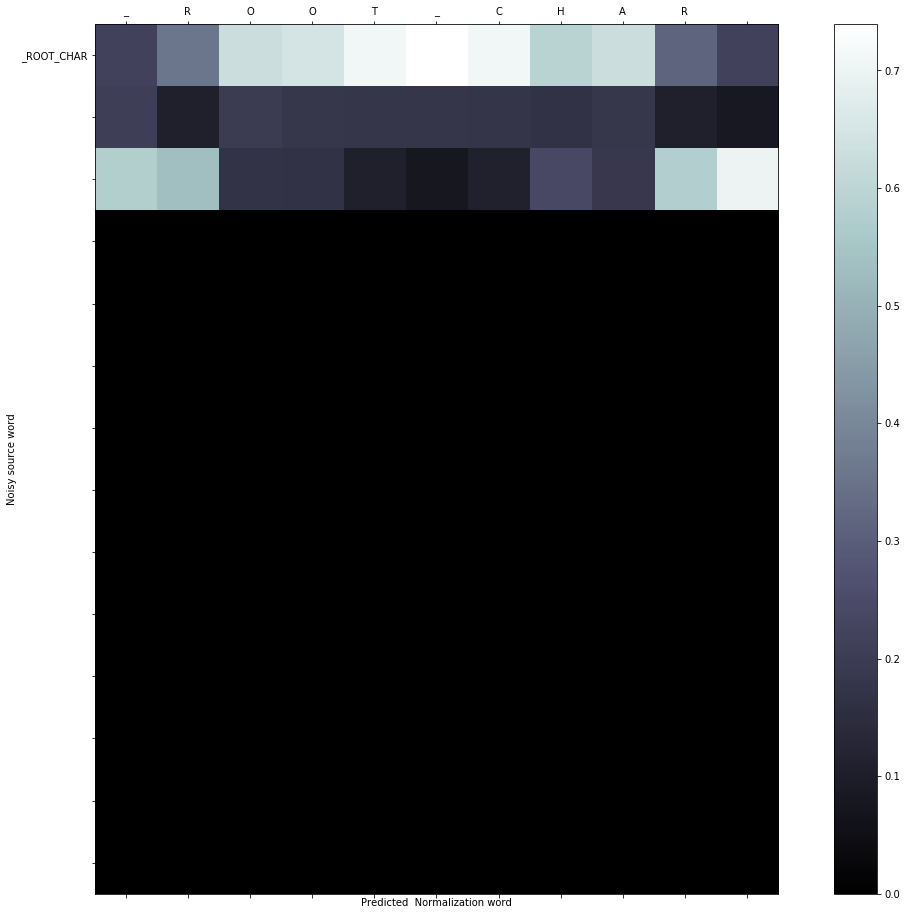

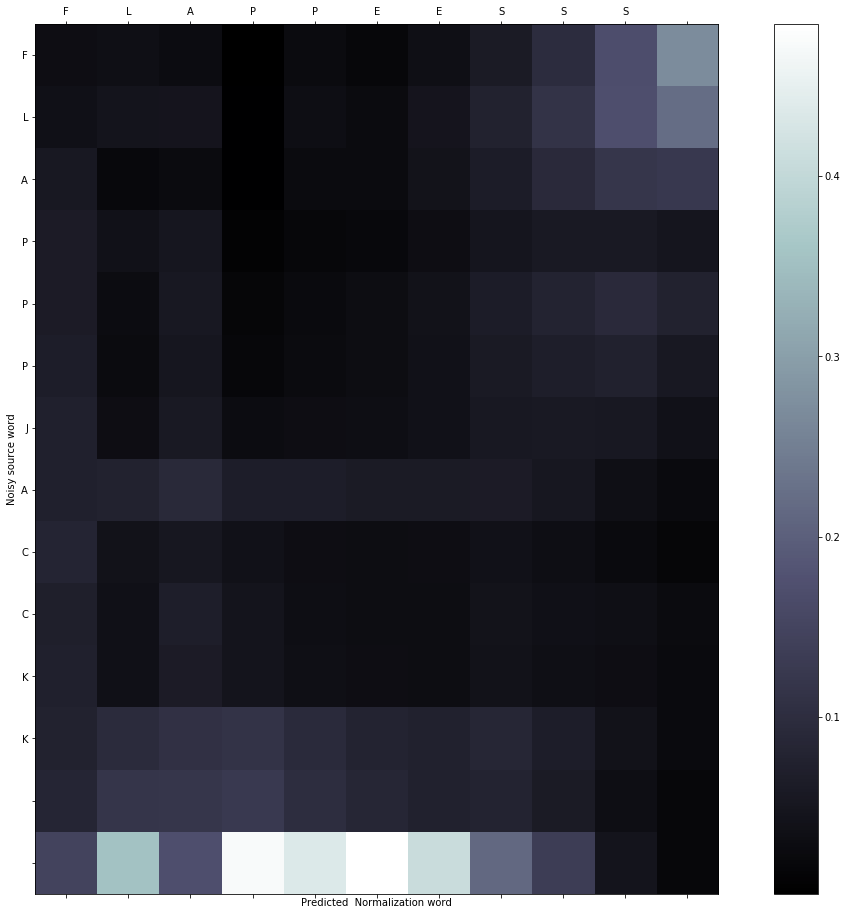

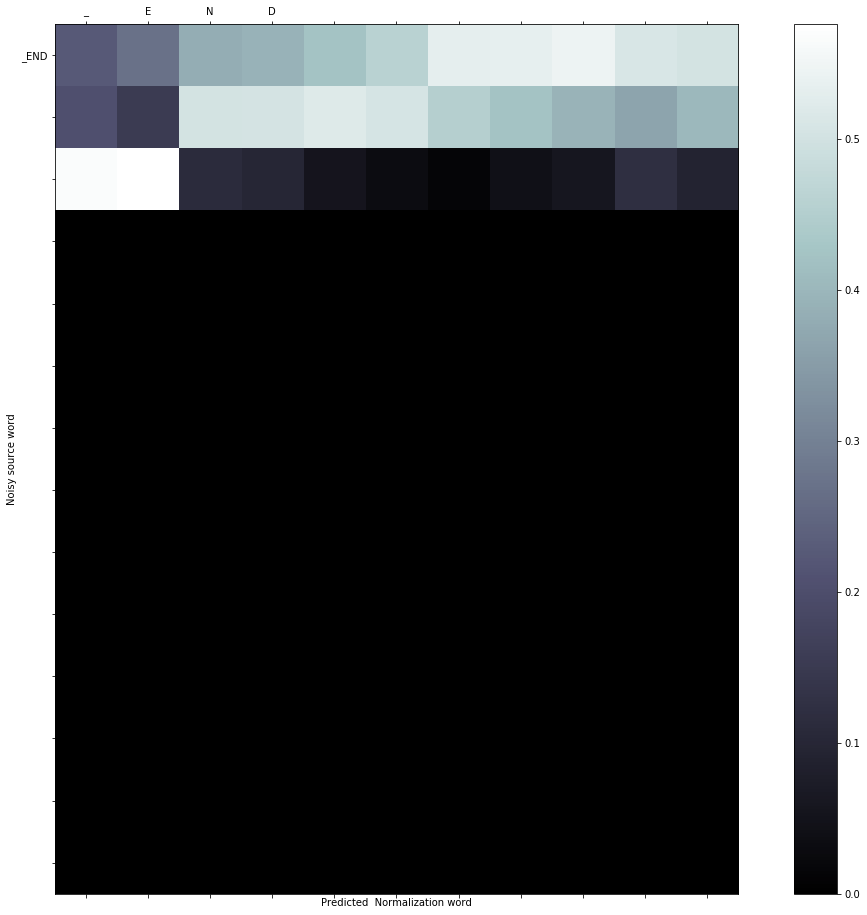

DECODED text is : ['_ROOT_CHAR', 'FLAPPEESSS', '_END'] original is ['_ROOT_CHAR', 'FLAPPPJACCKK', '_END'] and None seen as word embed 
Please type what you want to normalize word by word and finishes by 'stop' ? to end type : 'END'    2gether
Please type what you want to normalize word by word and finishes by 'stop' ? to end type : 'END'    stop
sent ['2gether']
Attention shape torch.Size([3, 8, 9])
Attention tensor([[[ 0.2170,  0.2076,  0.5754,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000],
         [ 0.3488,  0.1065,  0.5447,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000],
         [ 0.6235,  0.1974,  0.1790,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000],
         [ 0.6417,  0.1817,  0.1766,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000],
         [ 0.7065,  0.1814,  0.1122,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000],
         [ 0.7362,  0.1802,  0.0836,  0.0000,  0.0000,  0.0000,  0.0000,
    

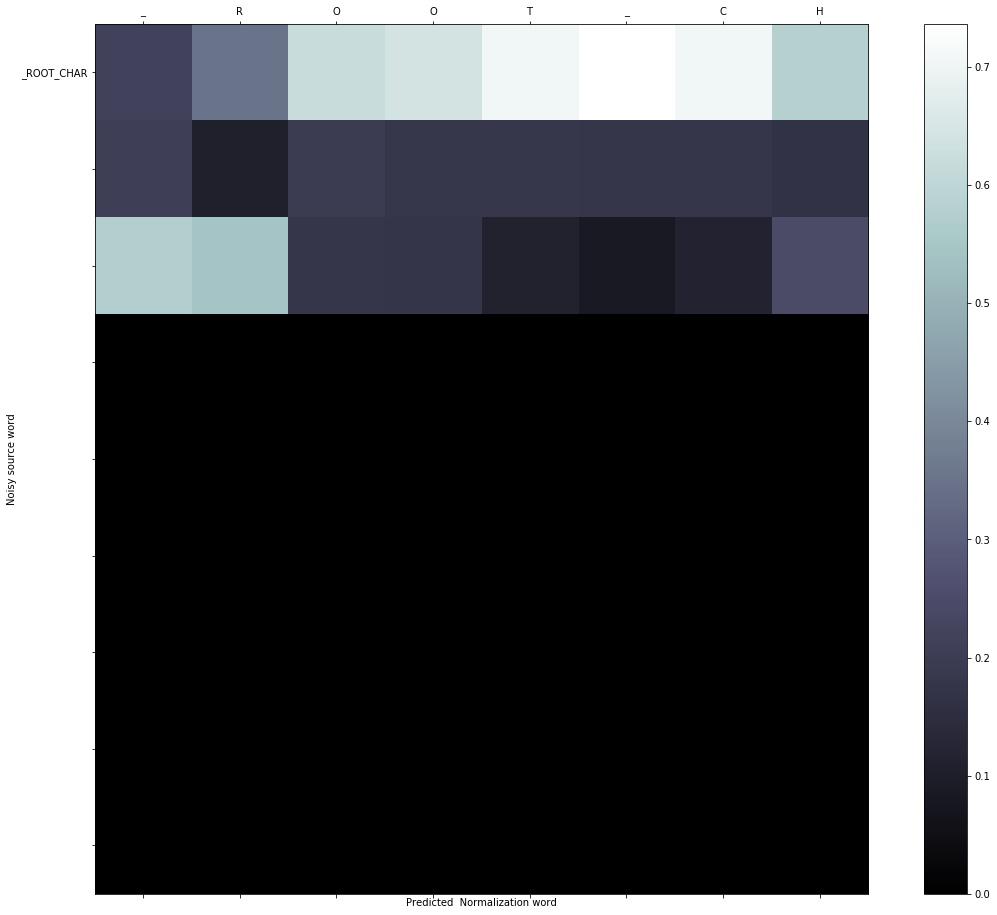

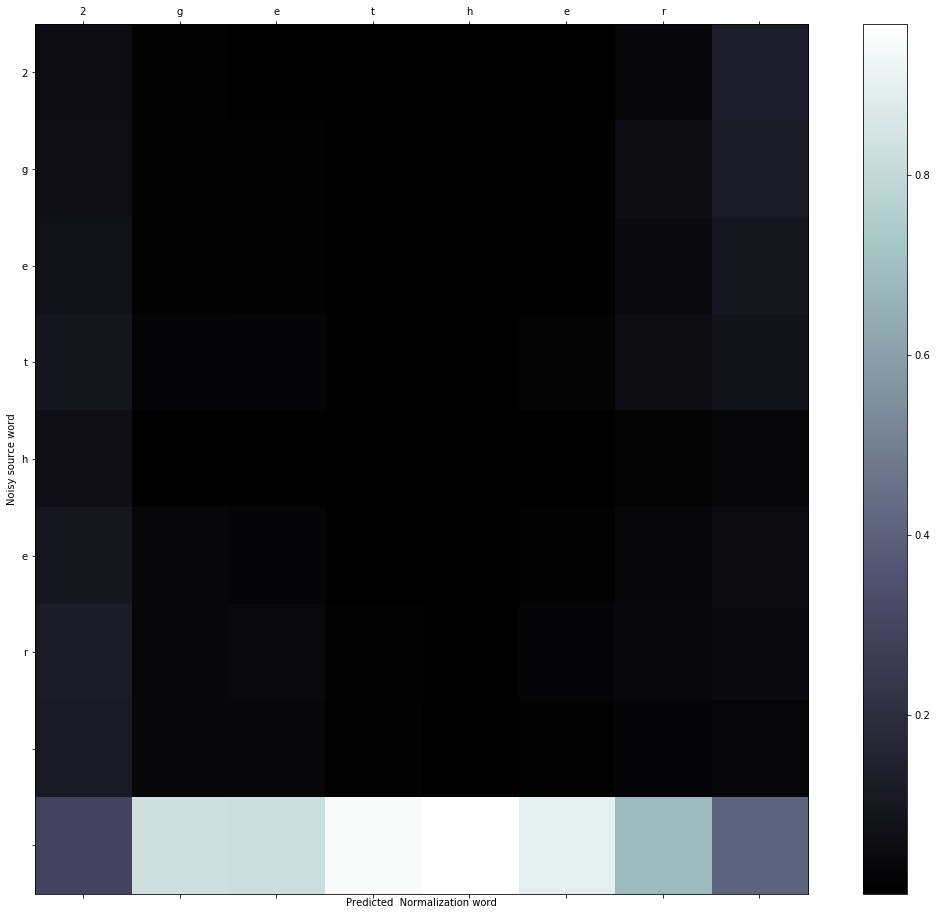

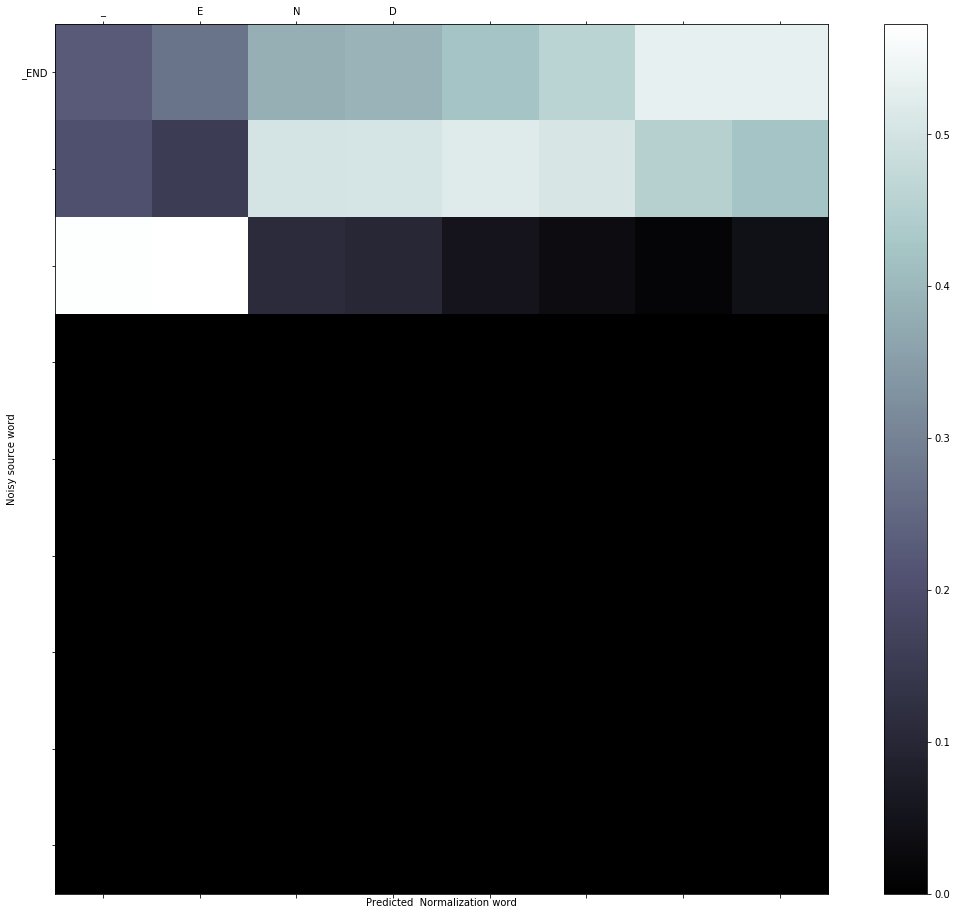

DECODED text is : ['_ROOT_CHAR', '2gether', '_END'] original is ['_ROOT_CHAR', '2gether', '_END'] and None seen as word embed 
Please type what you want to normalize word by word and finishes by 'stop' ? to end type : 'END'    paaiidd
Please type what you want to normalize word by word and finishes by 'stop' ? to end type : 'END'    stop
sent ['paaiidd']
Attention shape torch.Size([3, 8, 9])
Attention tensor([[[ 0.2170,  0.2076,  0.5754,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000],
         [ 0.3503,  0.1069,  0.5428,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000],
         [ 0.6252,  0.1982,  0.1766,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000],
         [ 0.6444,  0.1826,  0.1730,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000],
         [ 0.7080,  0.1819,  0.1101,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000],
         [ 0.7376,  0.1804,  0.0820,  0.0000,  0.0000,  0.0000,  0.0000,
           0

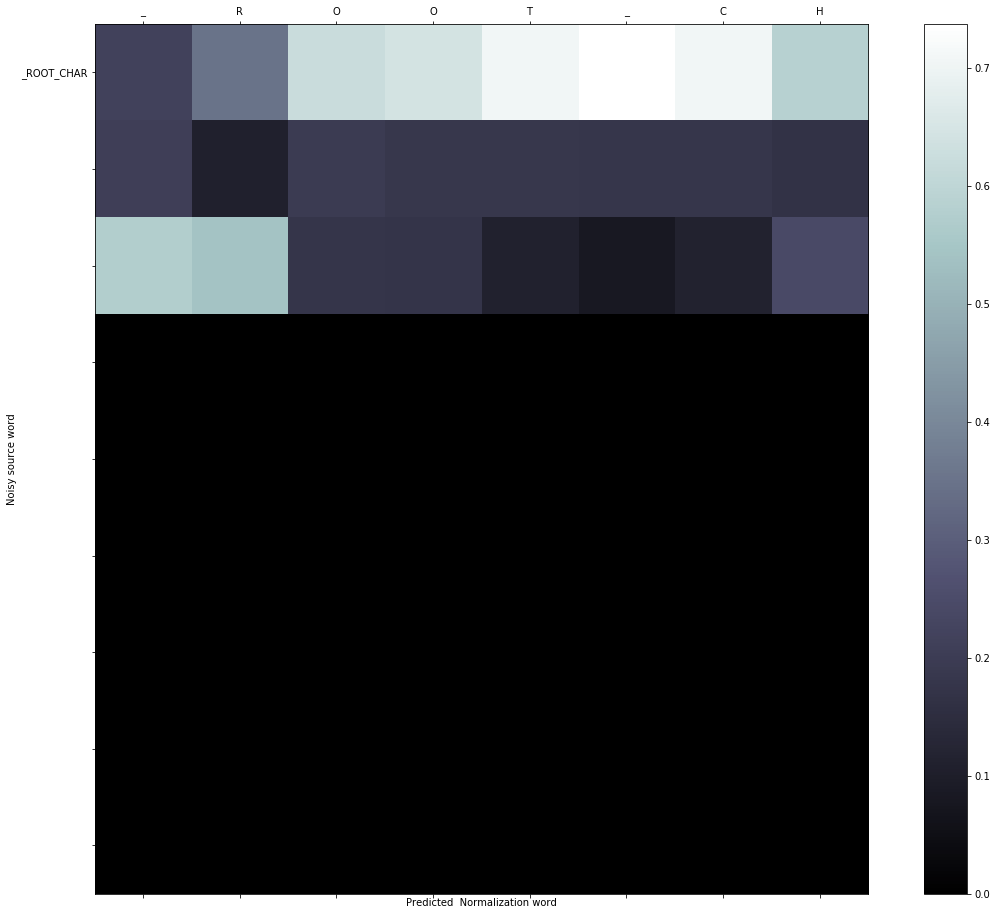

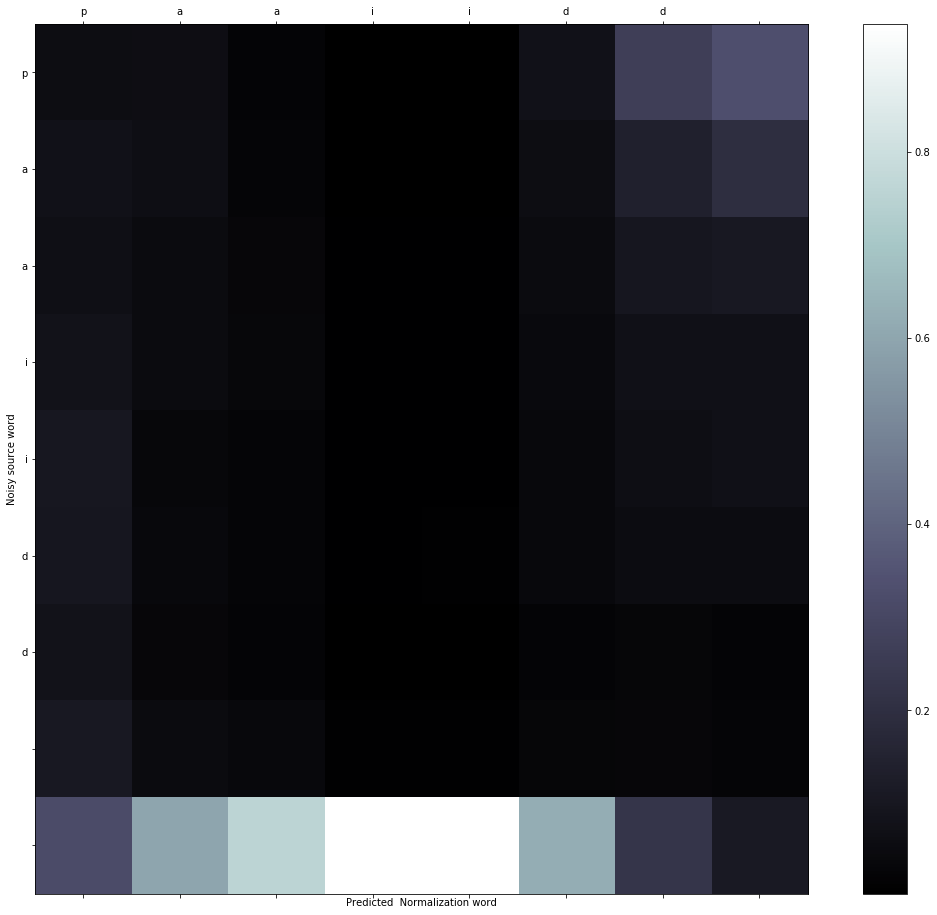

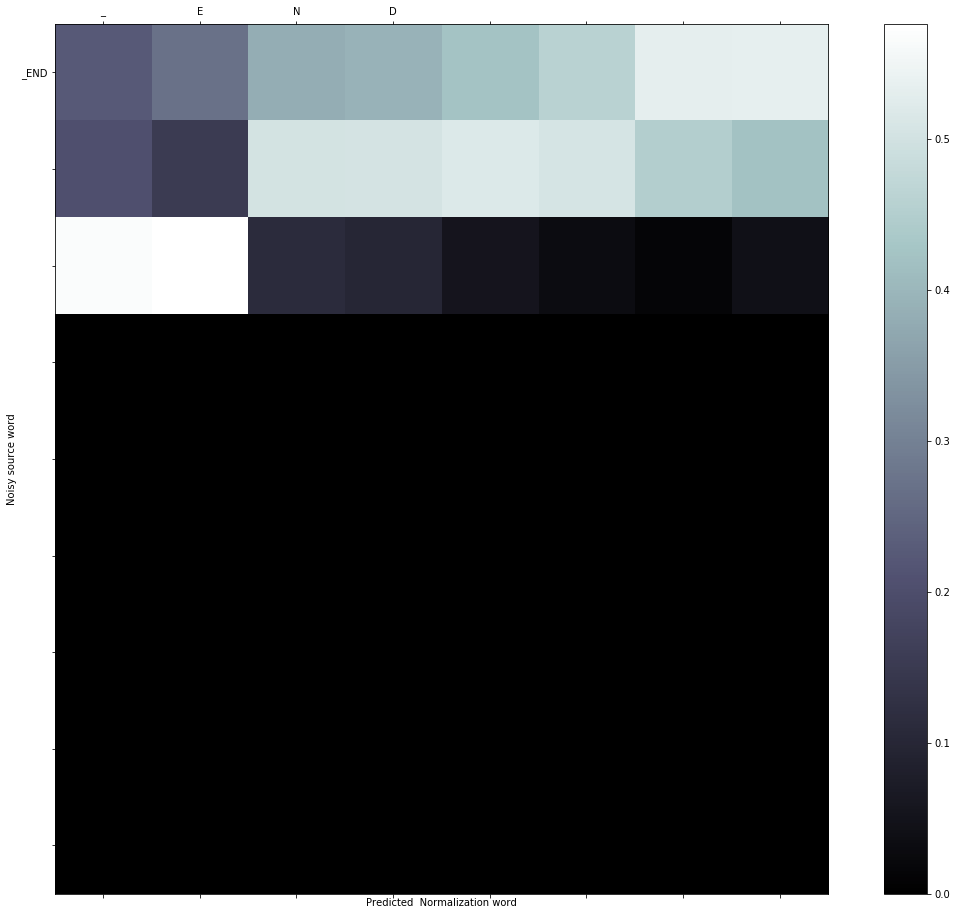

DECODED text is : ['_ROOT_CHAR', 'paaiidd', '_END'] original is ['_ROOT_CHAR', 'paaiidd', '_END'] and None seen as word embed 
Please type what you want to normalize word by word and finishes by 'stop' ? to end type : 'END'    whole
Please type what you want to normalize word by word and finishes by 'stop' ? to end type : 'END'    stop
sent ['whole']
Attention shape torch.Size([3, 6, 7])
Attention tensor([[[ 0.2170,  0.2076,  0.5754,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.3487,  0.1064,  0.5449,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.6229,  0.1974,  0.1796,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.6412,  0.1818,  0.1770,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.7063,  0.1814,  0.1122,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.7360,  0.1802,  0.0838,  0.0000,  0.0000,  0.0000,  0.0000]],

        [[ 0.0763,  0.0830,  0.1121,  0.0960,  0.1130,  0.1542,  0.3653],
         [ 0.0136,  0.0191,  0.0328,  0.0115,  0.0272,  0.0514,  0.8444],
     

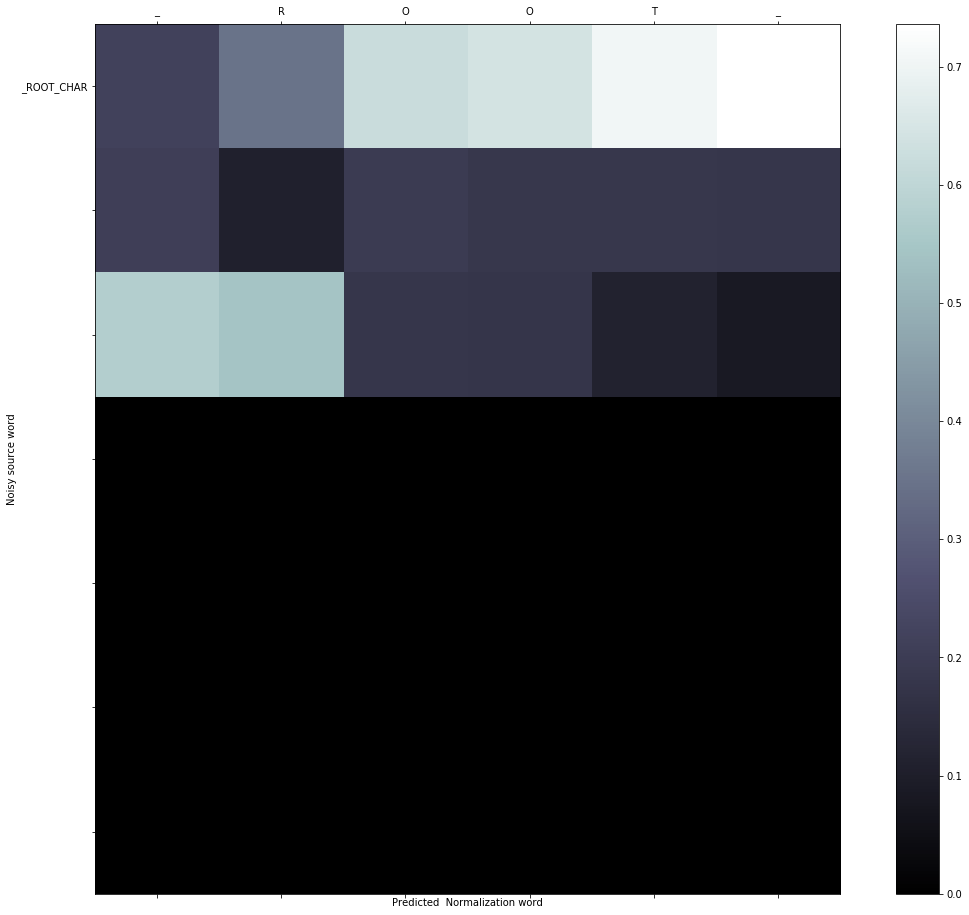

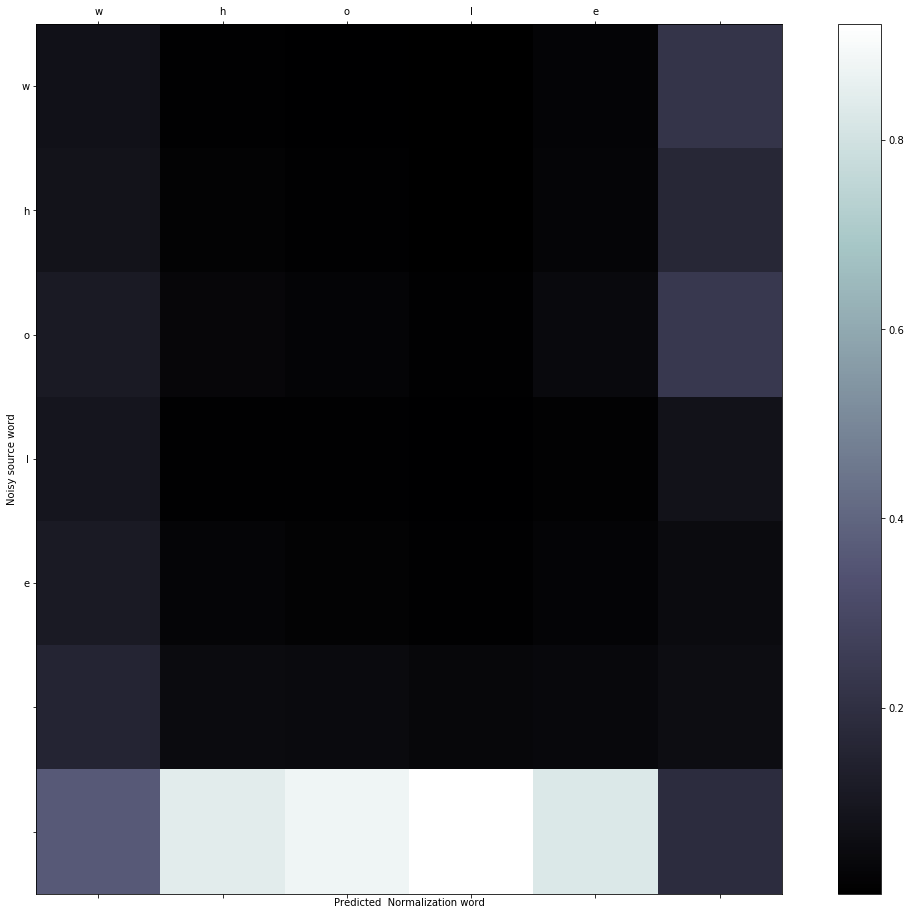

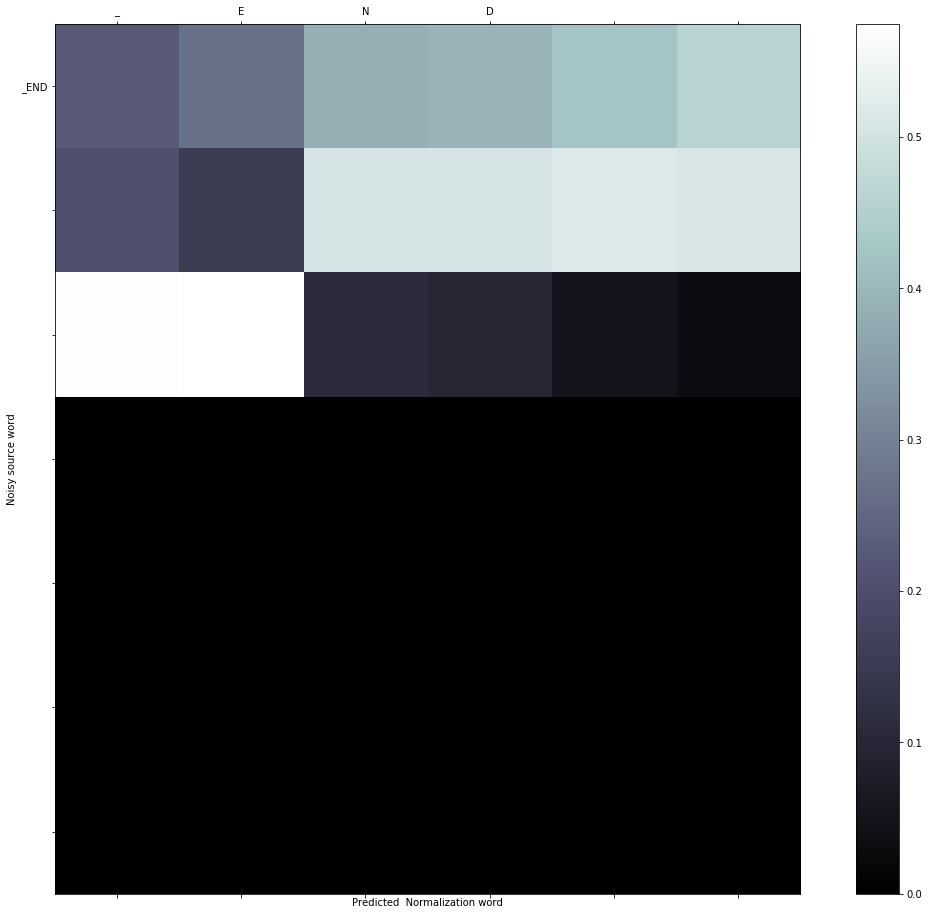

DECODED text is : ['_ROOT_CHAR', 'whole', '_END'] original is ['_ROOT_CHAR', 'whole', '_END'] and None seen as word embed 


In [ ]:
for folder_name in list_:
    assert len(list_)>0, "list empty"
    model_full_name = folder_name[:-7]
    print("\n\n--------------------------------Interatcing with new model--------------------------------\n", model_full_name,"\n\n")
    dic_path = os.path.join(script_dir, "..", "checkpoints", model_full_name + "-folder", "dictionaries")
    model_dir = os.path.join(script_dir, "..", "checkpoints", model_full_name + "-folder")
    interact(dic_path=dic_path, dir_model=model_dir, model_full_name=model_full_name, debug=False, 
             show_attention=True,verbose=0,extra_arg_specific_label="X1-fine_tune_same_rate-X1",
             save_attention=False)
    #break

## Comments
- on model 97077_rioc-ee386-REP_-replicate1-1dir-scale_1-model_15_f19e with auxilliary task no attention quite small model
    - interesting case : 
        - my normalized to tomorrow : probably bcause of 2mor --> tommorow 
    - very lame at decoding very short word ? 
- 97147_rioc-6ed16-ATTCONTEXT-with_att-dir_2-X-dropout_bridge0.1-context_word-model_4_76a1
    - attention is not static --> but no clear trend
    - interetsintgly with same model but only using sent context : the attention focus on last word all the time "97147_rioc-6ed16-ATTCONTEXT-with_att-dir_2-X-dropout_bridge0.1-context_sent-model_2_7d92" 
    
- "97184_rioc-0cc46-ATTstandart_passing-with_att-dir_2-X-context_all-stable_decoding_state-init_context_decoder_False-model_4_2ffa"
    - the best model you played with so far
    - classification does not agree with seq predictiion : most of the classification is NORMED while it performs some change

In [1]:
!open

Usage: open [-e] [-t] [-f] [-W] [-R] [-n] [-g] [-h] [-s <partial SDK name>][-b <bundle identifier>] [-a <application>] [filenames] [--args arguments]
Help: Open opens files from a shell.
      By default, opens each file using the default application for that file.  
      If the file is in the form of a URL, the file will be opened as a URL.
Options: 
      -a                Opens with the specified application.
      -b                Opens with the specified application bundle identifier.
      -e                Opens with TextEdit.
      -t                Opens with default text editor.
      -f                Reads input from standard input and opens with TextEdit.
      -F  --fresh       Launches the app fresh, that is, without restoring windows. Saved persistent state is lost, excluding Untitled documents.
      -R, --reveal      Selects in the Finder instead of opening.
      -W, --wait-apps   Blocks until the used applications are closed (even if they were already running).
  

In [ ]:
"./dat